<a href="https://colab.research.google.com/github/sapnachavan7875-lgtm/Data-Science-Learning/blob/main/SalarySense_Ai_Salary_Prediction_system32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GitHub URL Dataset load**

In [71]:
import pandas as pd

url = "https://raw.githubusercontent.com/pravinknr/DataScience_R_Codes/master/2.%20Implemetation%20of%20the%20Algorithms%20on%20Datasets/Linear%20Regression/Simple%20Linear%20Regression/Salary%20Data/Salary_Data.csv"

df = pd.read_csv(url)

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**check Dataset**

In [72]:
print(df.shape)

(30, 2)


In [73]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


**EDA**

**Basic Dataset Overview**

In [75]:
print("Shape of dataset:", df.shape)

print("\nColumns:", df.columns)

print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (30, 2)

Columns: Index(['YearsExperience', 'Salary'], dtype='object')

First 5 rows:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


**Dataset information**

In [76]:
print("\nDataset Info:\n")

df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


**Statistical Summary**

In [77]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Missing Values Check**

In [78]:
print("Missing values:\n")

df.isnull().sum()

Missing values:



,0
YearsExperience,0
Salary,0


**Salary distribution Graph**

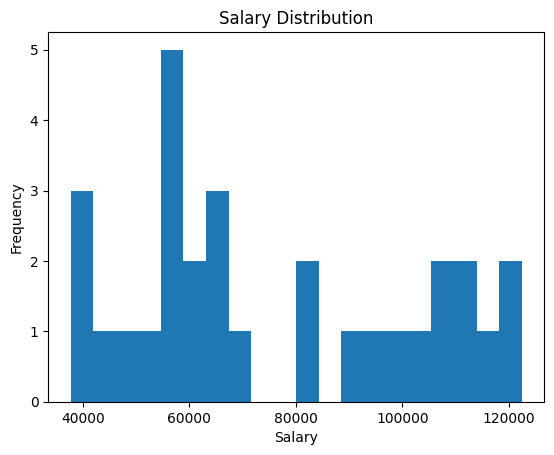

In [79]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(df['Salary'], bins=20)

plt.title("Salary Distribution")

plt.xlabel("Salary")

plt.ylabel("Frequency")

plt.show()

**Experience Vs Salary Graph**

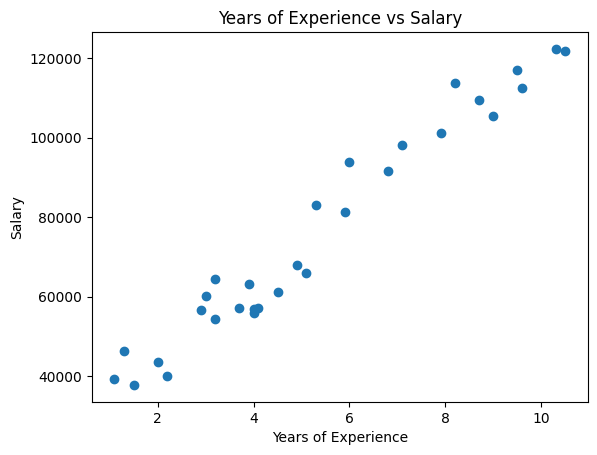

In [80]:
plt.figure()

plt.scatter(df['YearsExperience'], df['Salary'])

plt.title("Years of Experience vs Salary")

plt.xlabel("Years of Experience")

plt.ylabel("Salary")

plt.show()

**Correlation Check**

In [81]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


**Data cleaning**

**Missing Values Remove**

In [82]:
print("Missing values before cleaning:\n", df.isnull().sum())

df = df.dropna()

print("\nMissing values after cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 YearsExperience    0
Salary             0
dtype: int64

Missing values after cleaning:
 YearsExperience    0
Salary             0
dtype: int64


**Duplicate Values Check and remove**

In [83]:
print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

print("Duplicate rows after cleaning:", df.duplicated().sum())

Duplicate rows: 0
Duplicate rows after cleaning: 0


**Data type Check**

In [84]:
df.dtypes

,0
YearsExperience,float64
Salary,float64


**Final Dataset shape Check**

In [85]:
print("Final dataset shape:", df.shape)

Final dataset shape: (30, 2)


**Cleaned Dataset Preview**

In [86]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


**Features and Target Define**

In [87]:
X = df[['YearsExperience']]

y = df['Salary']

print("Feature shape:", X.shape)

print("Target shape:", y.shape)

Feature shape: (30, 1)
Target shape: (30,)


**Feature Preview**

In [88]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


**Target Preview**

In [89]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


**Train-Test Split**

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training data shape:", X_train.shape)

print("Testing data shape:", X_test.shape)

Training data shape: (24, 1)
Testing data shape: (6, 1)


**Linear Regression Model import**

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

**Model Train**

In [92]:
model.fit(X_train, y_train)

print("Model training complete")

Model training complete


**Model Prediction**

In [93]:
y_pred = model.predict(X_test)

print("Predicted salaries:\n", y_pred)

Predicted salaries:
 [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


**Actual Vs predicted Comparee**

In [94]:
import pandas as pd

comparison = pd.DataFrame({
    "Actual Salary": y_test,
    "Predicted Salary": y_pred
})

comparison

,Actual Salary,Predicted Salary
27,112635.0,115790.210113
15,67938.0,71498.278095
23,113812.0,102596.868661
17,83088.0,75267.804224
8,64445.0,55477.792045
9,57189.0,60189.699707


**Model Accuracy check**

In [95]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred)

print("Model Accuracy (R² Score):", accuracy)

Model Accuracy (R² Score): 0.9024461774180497


**Salary prediction for New Experience**

In [96]:
experience = [[5]]   # 5 years experience

predicted_salary = model.predict(experience)

print("Predicted salary for 5 years experience:", predicted_salary[0])

Predicted salary for 5 years experience: 72440.6596269317


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Training Data Graph**

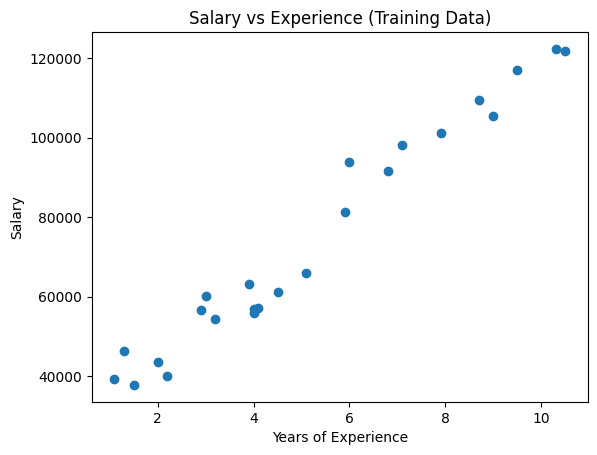

In [97]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(X_train, y_train)

plt.title("Salary vs Experience (Training Data)")

plt.xlabel("Years of Experience")

plt.ylabel("Salary")

plt.show()

**Regression line Graph**

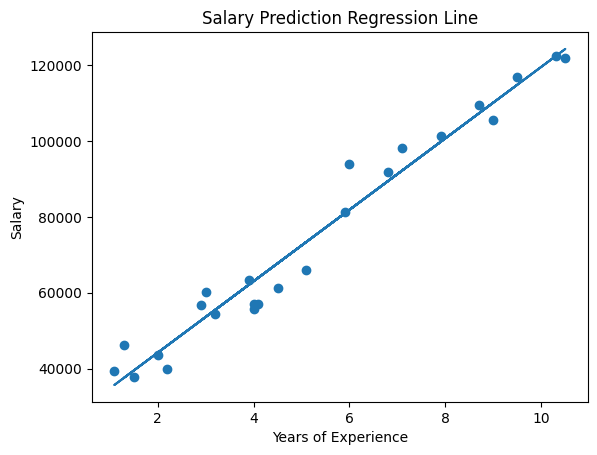

In [98]:
plt.figure()

plt.scatter(X_train, y_train)

plt.plot(X_train, model.predict(X_train))

plt.title("Salary Prediction Regression Line")

plt.xlabel("Years of Experience")

plt.ylabel("Salary")

plt.show()

**Testing Data Graph**

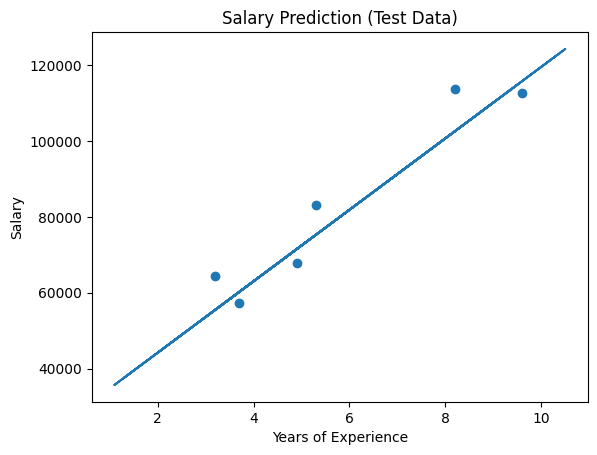

In [99]:
plt.figure()

plt.scatter(X_test, y_test)

plt.plot(X_train, model.predict(X_train))

plt.title("Salary Prediction (Test Data)")

plt.xlabel("Years of Experience")

plt.ylabel("Salary")

plt.show()

**Actual vs Predictedd Comparison Graph**


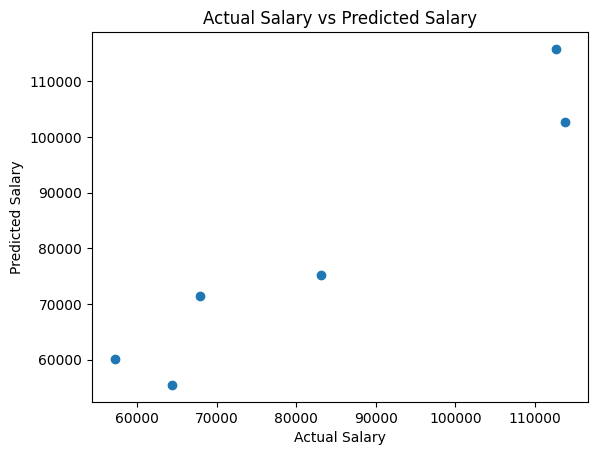

In [100]:
plt.figure()

plt.scatter(y_test, y_pred)

plt.title("Actual Salary vs Predicted Salary")

plt.xlabel("Actual Salary")

plt.ylabel("Predicted Salary")

plt.show()

In [104]:
from sklearn.linear_model import LinearRegression
import pickle

model = LinearRegression()

model.fit(X_train, y_train)

with open("salary_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model trained and saved successfully")

Model trained and saved successfully


**Check Model file Exist**

In [105]:
import os

print(os.listdir())

['.config', 'salary_model.pkl', 'sample_data']


**Model Load**

In [106]:
import pickle

loaded_model = pickle.load(open("salary_model.pkl", "rb"))

print("Model loaded successfully")

Model loaded successfully


**Prediction**

In [107]:
experience = [[7]]

salary = loaded_model.predict(experience)

print("Predicted salary:", salary[0])

Predicted salary: 91288.29027299365


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
